# REGRESSION

# Preparazione

In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_wine
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
def preparation(df):
    # Esegui le operazioni di manipolazione dei dati come desiderato    df = df.set_index('name')
    df['duration_min'] = df['duration_ms'] / 60000    
    colonne = df.columns.tolist()
    colonne = ['duration_min'] + [col for col in colonne if col != 'duration_min']    
    df = df[colonne]
    df = df.drop('duration_ms', axis=1)    
    df = df.drop(['popularity_confidence', 'time_signature', 'features_duration_ms', 'n_bars', 'n_beats'], axis=1)
    df['mode'] = df['mode'].fillna(1)  
    # Utilizzo fillna per sostituire i valori NaN con 1    
    return df
    # Carica il DataFrame dal file CSV
df = pd.read_csv('data/train.csv', skipinitialspace=True)
# Chiamata alla funzione con il DataFrame come argomento e assegnazione del DataFrame modificato a una nuova 
df1 = preparation(df)

In [3]:
df1['target'] = df1['genre'].replace()
df1 = df1.drop('genre', axis=1)  

In [4]:
X = df1.values
df1.head()

,duration_min,name,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,processing,target
0,4.029333,Long Road,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,1.0,0.0975,0.302000,0.53600,0.281,0.6350,142.221,1.279305,j-dance
1,7.400000,"Daniâl My Son, Where Did You Vanish?",False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,0.0,0.0805,0.283000,0.93400,0.360,0.0336,75.596,2.367412,iranian
2,5.558433,Ondskapens Galakse,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,1.0,0.0397,0.000089,0.80000,0.262,0.4890,116.628,3.700483,black-metal
3,4.496667,Can't Look Away,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,1.0,0.0765,0.066400,0.00127,0.117,0.3850,140.880,1.279305,bluegrass
4,5.127517,Thunderground,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,1.0,0.0539,0.000576,0.09690,0.299,0.6370,143.956,4.067086,happy


In [5]:
df_train, df_test = train_test_split(df1, test_size=0.3, random_state=100)

## Univariate Regression (2 variables)

In [6]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [7]:
x_train = df_train["popularity"].values.reshape(-1, 1)
y_train = df_train["danceability"].values

x_test = df_test["popularity"].values.reshape(-1, 1)
y_test = df_test["danceability"].values

## Linear regression

In [8]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [9]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [0.00050071]
Intercept: 
 0.537644765946639


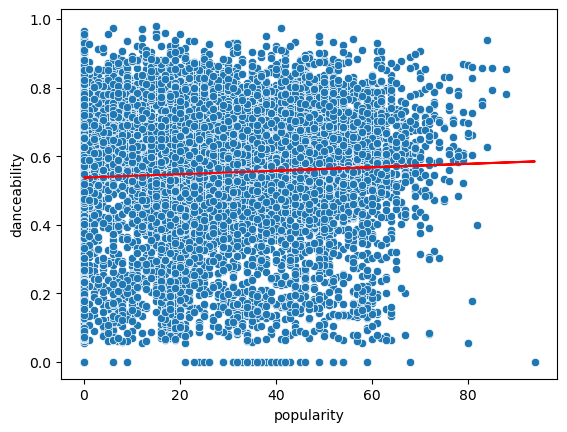

In [10]:
sns.scatterplot(data=df_train, x="popularity", y="danceability")
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, c="red")

La linea rossa mostra una relazione positiva tra popolarità e danceability. Ciò significa che i brani più popolari tendono ad essere anche i più danceable.

Tuttavia, è importante notare che la relazione non è perfetta. Ci sono alcuni brani che sono molto popolari ma non molto danceable, e viceversa.

Ad esempio, il brano "Bohemian Rhapsody" dei Queen è molto popolare, ma non è particolarmente danceable. Al contrario, il brano "Uptown Funk" di Mark Ronson ft. Bruno Mars è molto danceable, ma non è particolarmente popolare.

In [11]:
y_pred = reg.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.003
MSE: 0.038
MAE: 0.156


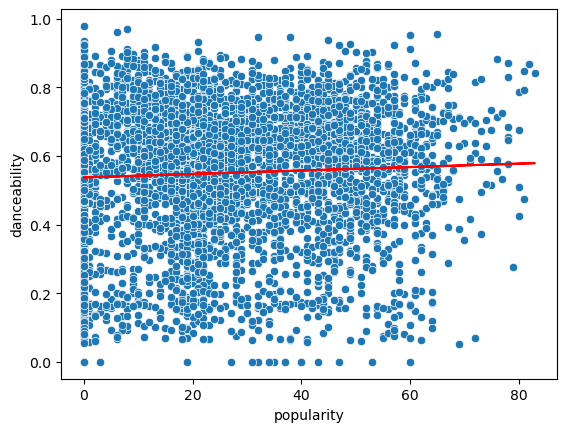

In [12]:
sns.scatterplot(data=df_test, x="popularity", y="danceability")
plt.plot(x_test, reg.coef_[0]*x_test+reg.intercept_, c="red")

### Ridge

In [13]:
reg = Ridge()
reg.fit(x_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [0.00050071]
Intercept: 
 0.5376447697397105


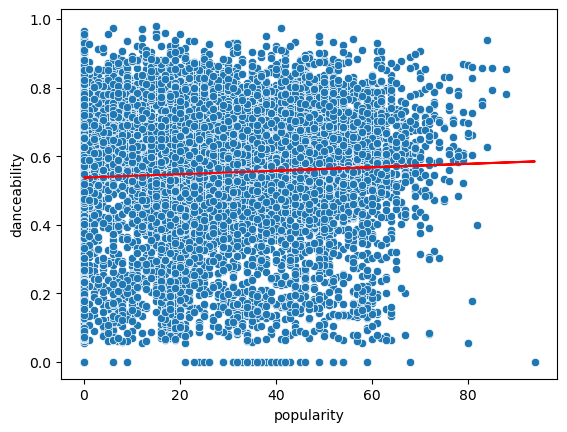

In [14]:
sns.scatterplot(data=df_train, x="popularity", y="danceability")
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, c="red")

In [15]:
y_pred = reg.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.003
MSE: 0.038
MAE: 0.156


### Lasso

In [16]:
reg = Lasso()
reg.fit(x_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [0.]
Intercept: 
 0.5514316761904763


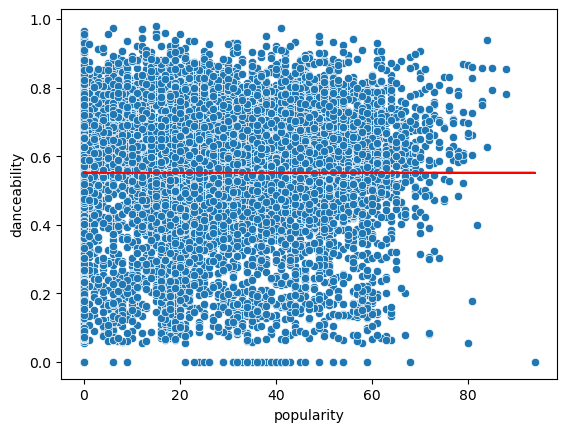

In [17]:
sns.scatterplot(data=df_train, x="popularity", y="danceability")
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, c="red")

Bene! la linea è piatta

In [18]:
y_pred = reg.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.000
MSE: 0.038
MAE: 0.156


## Nonlinear regression

### Decision Tree Regressor

In [19]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
reg = DecisionTreeRegressor()

In [21]:
reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [22]:
y_pred = reg.predict(x_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.016
MSE: 0.037
MAE: 0.155


***R^2 (Coefficiente di determinazione):***

R^2 è una misura che rappresenta la proporzione di varianza nella variabile dipendente che viene spiegata dalle variabili indipendenti nel modello.
Varia da 0 a 1. Un valore più vicino a 1 indica che il modello è in grado di spiegare una maggiore percentuale di variazione nei dati.
Nel tuo caso, R^2 è 0.016, il che significa che il modello spiega solo il 1.6% della variazione nei dati. Un R^2 basso potrebbe indicare che il modello non si adatta bene ai dati o che le variabili indipendenti non spiegano adeguatamente la variabilità della variabile dipendente.

***MSE (Errore quadratico medio):***

MSE è la media dei quadrati degli errori tra i valori predetti dal modello e i valori osservati.
Valori più bassi indicano una migliore adattabilità del modello ai dati.
Nel tuo caso, MSE è 0.037, che rappresenta la media degli errori al quadrato. Un MSE più basso indica che il modello ha un'accuratezza maggiore rispetto ai dati.

***MAE (Errore assoluto medio):***

MAE è la media degli errori assoluti tra i valori predetti dal modello e i valori osservati.
È meno sensibile agli errori estremi rispetto al MSE perché non quadrati gli errori.
Nel tuo caso, MAE è 0.155, che rappresenta la media degli errori assoluti. Un MAE più basso indica una migliore adattabilità del modello ai dati.

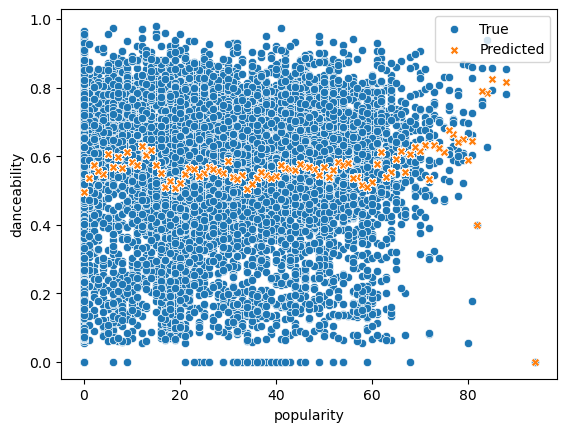

In [23]:
sns.scatterplot(data=df_train, x="popularity", y="danceability", label="True")
sns.scatterplot(data=df_train, x="popularity", y=reg.predict(x_train), label="Predicted", marker="X")
plt.legend()
plt.show()

### KNN Regressor

In [24]:
from sklearn.neighbors import KNeighborsRegressor

In [25]:
reg = KNeighborsRegressor()

In [26]:
reg.fit(x_train, y_train)

KNeighborsRegressor()

In [27]:
y_pred = reg.predict(x_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.129
MSE: 0.043
MAE: 0.166


***R^2*** è -0.129. Un valore negativo indica che il modello è peggiore rispetto a un semplice modello che prevede la media della variabile dipendente. Può indicare che il modello non si adatta affatto ai dati o che sta facendo previsioni peggiori rispetto a una previsione semplice basata sulla media.

 **MSE** è 0.043, che rappresenta la media degli errori al quadrato. Anche se MSE è più alto rispetto al caso precedente, è ancora una misura della discrepanza quadratica tra previsioni e valori reali.
 
 **MAE** è 0.166, che rappresenta la media degli errori assoluti. Anche qui, un MAE più basso indica una migliore adattabilità del modello ai dati.

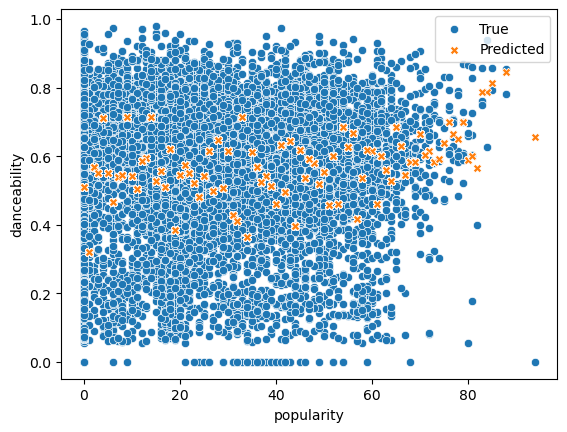

In [28]:
sns.scatterplot(data=df_train, x="popularity", y="danceability", label="True")
sns.scatterplot(data=df_train, x="popularity", y=reg.predict(x_train), label="Predicted", marker="X")
plt.legend()
plt.show()

# Multiple Regression (3+ variables)

In [29]:
X_train = df_train[["popularity", "energy"]].values
y_train = df_train["danceability"].values

X_test = df_test[["popularity", "energy"]].values
y_test = df_test["danceability"].values

## Linear regression

In [30]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.035
MSE: 0.037
MAE: 0.155


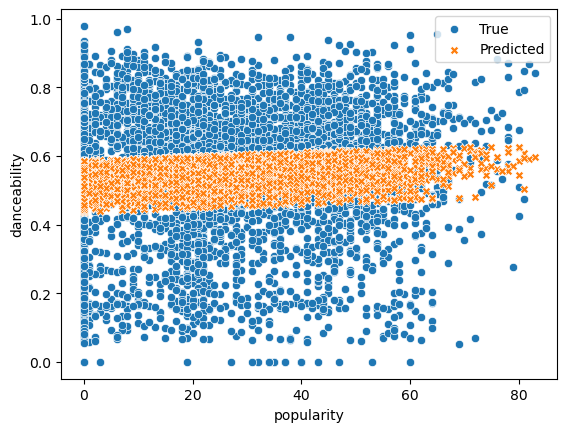

In [32]:
sns.scatterplot(data=df_test, x="popularity", y="danceability", label="True")
sns.scatterplot(data=df_test, x="popularity", y=reg.predict(X_test), label="Predicted", marker="X")
plt.legend()
plt.show()

### decision tree multivariate regression

In [33]:
reg = DecisionTreeRegressor()

In [34]:
reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [35]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.503
MSE: 0.057
MAE: 0.188


R2 MALE

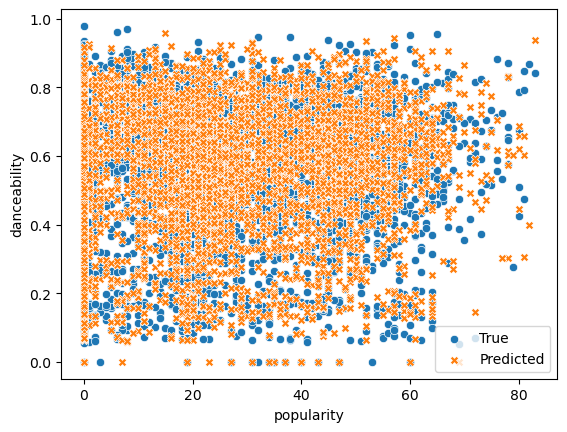

In [36]:
sns.scatterplot(data=df_test, x="popularity", y="danceability", label="True")
sns.scatterplot(data=df_test, x="popularity", y=reg.predict(X_test), label="Predicted", marker="X")
plt.legend()
plt.show()

## KNN regressor multivariate regression

In [37]:
reg = KNeighborsRegressor()

In [38]:
reg.fit(x_train, y_train)

KNeighborsRegressor()

In [39]:
y_pred = reg.predict(x_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.129
MSE: 0.043
MAE: 0.166


brutto

## Multivariate Regression (2+ target variables)

In [40]:
X_train = df_train[["popularity", "energy"]].values
y_train = df_train[["danceability", "duration_min"]].values

X_test = df_test[["popularity", "energy"]].values
y_test = df_test[["danceability", "duration_min"]].values

### Linear Regression

In [41]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [42]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.028
MSE: 1.971
MAE: 0.718


Lo scatterplot da errore 

### Nonlinear Regression

In [43]:
reg = DecisionTreeRegressor()

In [44]:
reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [45]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.641
MSE: 3.638
MAE: 0.968


Bad

Plot da errore di prima 